## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest 



## Data

In [2]:
data = pd.read_csv('data2.csv.gz')
data

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
796,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

# Data is binary 0 and 1
# very imbalanaced 
# some columns have 0 variance on the whole sample : they provide no info -> we drop for some of the methods 


In [3]:
data.shape

(800, 100001)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Columns: 100001 entries, label to 99999
dtypes: int64(100001)
memory usage: 610.4 MB


In [5]:
summary = data.describe()
summary

,label,0,1,2,3,4,5,6,7,8,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
count,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.0,800.000000,800.0,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.805000,0.012500,0.0,0.001250,0.0,0.020000,0.003750,0.017500,0.001250,0.006250,...,0.013750,0.007500,0.0,0.001250,0.0,0.006250,0.007500,0.012500,0.006250,0.035000
std,0.593646,0.111172,0.0,0.035355,0.0,0.140088,0.061161,0.131207,0.035355,0.078859,...,0.116524,0.086331,0.0,0.035355,0.0,0.078859,0.086331,0.111172,0.078859,0.183895
min,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#check if the data has any null values:
print("Total missing values: ", data.isnull().sum().sum())

Total missing values:  0


In [7]:
#the first column has the target values, while the other columns are features
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

label
-1    722
 1     78
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

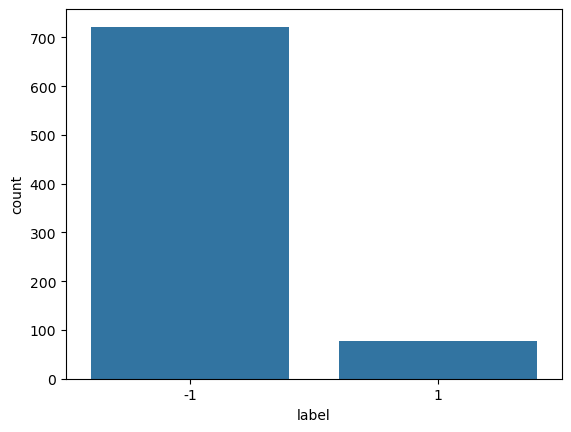

In [8]:
#check if the balance of the data:
print(Y.value_counts())
sns.countplot(x=Y)

In [9]:
print(Y.value_counts(normalize=True))

label
-1    0.9025
 1    0.0975
Name: proportion, dtype: float64


The above plot shows that the data is imbalanced and it may needs to be oversampled to handle the imbalance. Models trained on imbalanced data may become biased toward the majority class, ignoring the minority class.

In [10]:
sparsity = (X == 0).sum().sum() / (X.shape[0] * X.shape[1])
print(f"Sparsity: {sparsity * 100:.2f}%")

Sparsity: 99.09%


We split the data into train and test data: 
* setting stratify to yes ensures -> the proportion of values in the sample produced will be the same as the proportion of values provided by parameter

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Functions

### General Thresholding function

In [12]:
def thresholding(threshold, y):
    '''
    transforms the predictions based on a given threshold
    
    args : threshold
         y: predicted probabilities
        
    returns: y_predictions
    '''
    y_copy = y.copy()
    y_copy[y_copy>threshold] = 1 
    y_copy[y_copy<=threshold] = -1
    return y_copy

In [13]:
#Hethe threshold are tuned:

def lasso_alpha (alpha, kf_splits = 5, X_train = X_train, y_train=y_train, thresholds=[0]):
    '''
    this function for a given alpha, it tunes the set of thresholds using Kfolds cross validation

    return: average threshold from the optimal thresholds
    '''

    kf = KFold(kf_splits)
    
    fold_optimal = []

    #cross validationg only on the training set
    
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        x_train_cv = X_train.iloc[train_index, :]
        x_test_cv = X_train.iloc[test_index,:] #test set from the training set
        y_train_cv = y_train.iloc[train_index]
        y_test_cv = y_train.iloc[test_index]
        lasso = Lasso(alpha)
        lasso.fit(x_train_cv, y_train_cv)
        y_pred = lasso.predict(x_test_cv)
        
        #tuning the threshold for each fold -> only training set used

        fold_scores = []
        for threshold in thresholds:
            y_label = thresholding(threshold, y_pred)
            fold_scores.append(balanced_accuracy_score(y_test_cv, y_label))

        #the best threshold per fold is appended to the optimal

        fold_optimal.append(thresholds[np.argmax(fold_scores)])  

    return np.average(fold_optimal) 

In [14]:
#this function tunes the threshold for any model that has the predict_proba 

def threshold_model (model=SVC(probability=True), kf_splits = 5, X_train = X_train, y_train=y_train, thresholds=[0]):
    kf = KFold(kf_splits)
    
    fold_optimal = []
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #cv splitting
        x_train_cv = X_train[train_index, :]
        x_test_cv = X_train[test_index,:]
        y_train_cv = y_train.iloc[train_index]
        y_test_cv = y_train.iloc[test_index]
        
        #model fit and predict for any model with predict proba

        model.fit(x_train_cv, y_train_cv)
        # This is now returning an array probabilit of class 1, prob class 2
        y_pred = model.predict_proba(x_test_cv)[:,1] #first column is the probabilities of the negative class
        #print(y_pred)
        fold_scores = []
        for threshold in thresholds:
            y_label = thresholding(threshold, y_pred)
            #print(y_label)
            fold_scores.append(balanced_accuracy_score(y_test_cv, y_label))
        #print(fold_scores)
        fold_optimal.append(thresholds[np.argmax(fold_scores)])
    return np.average(fold_optimal)

## Baseline Lasso
tuning alpha -> threshold set to default (=0)

In [15]:
alpha_space = np.arange(0.001,0.041,0.001)
#alpha_space

In [16]:
alpha_scores = []
for alpha in alpha_space:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    y_label = thresholding(0, y_pred)
    alpha_scores.append((alpha, balanced_accuracy_score(y_test, y_label)))
    print((alpha, balanced_accuracy_score(y_test, y_label)))

(0.001, 0.7673611111111112)
(0.002, 0.8020833333333333)
(0.003, 0.7986111111111112)
(0.004, 0.8020833333333333)
(0.005, 0.8020833333333333)
(0.006, 0.8020833333333333)
(0.007, 0.8020833333333333)
(0.008, 0.8055555555555556)
(0.009000000000000001, 0.7743055555555556)
(0.010000000000000002, 0.7777777777777778)
(0.011, 0.7777777777777778)
(0.012, 0.7777777777777778)
(0.013000000000000001, 0.7777777777777778)
(0.014000000000000002, 0.7777777777777778)
(0.015, 0.7777777777777778)
(0.016, 0.7777777777777778)
(0.017, 0.7465277777777778)
(0.018000000000000002, 0.7465277777777778)
(0.019000000000000003, 0.7152777777777778)
(0.02, 0.7152777777777778)
(0.021, 0.7152777777777778)
(0.022000000000000002, 0.7152777777777778)
(0.023, 0.7152777777777778)
(0.024, 0.7152777777777778)
(0.025, 0.7152777777777778)
(0.026000000000000002, 0.7152777777777778)
(0.027000000000000003, 0.7152777777777778)
(0.028, 0.7152777777777778)
(0.029, 0.7152777777777778)
(0.030000000000000002, 0.6527777777777778)
(0.031, 0.6

## Lasso with Threshold tuning

In [17]:
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]
alpha_space = np.arange(0.005, 0.05, 0.002)

In [18]:
balanced_scores = []  #8.12 it's not working as well

#for alpha space we tune threshold for each alpha and then test lasso with the optimal threshold on the test set

for alpha in alpha_space:
    #find optimal threshold for the given alpha
    optimal_threshold = lasso_alpha(alpha, X_train=X_train,y_train=y_train, thresholds=thresholds )

    #fit lasso model using the optimal threshold to get the balanced accuracy for this alpha
    lasso = Lasso(alpha, max_iter=10000, tol=0.00001)
    lasso.fit(X_train, y_train)
    y_predict = lasso.predict(X_test)
    
    #using the optial threshold we transform the prbabilities to labels
    y_label = thresholding(optimal_threshold,y_predict)
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]
    
    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))


(0.005, 0.8506944444444444, 181)
(0.007, 0.8576388888888888, 102)
(0.009000000000000001, 0.8576388888888888, 62)
(0.011, 0.8576388888888888, 34)
(0.013000000000000001, 0.8645833333333333, 20)
(0.015, 0.8333333333333333, 11)
(0.017, 0.8368055555555556, 7)
(0.019, 0.8368055555555556, 6)
(0.021, 0.8368055555555556, 6)
(0.023000000000000003, 0.7743055555555556, 5)
(0.025, 0.7743055555555556, 4)
(0.027, 0.8333333333333333, 4)
(0.029, 0.8333333333333333, 4)
(0.031000000000000003, 0.8333333333333333, 4)
(0.033, 0.8333333333333333, 3)
(0.034999999999999996, 0.8333333333333333, 3)
(0.037, 0.8368055555555556, 3)
(0.039, 0.8368055555555556, 3)
(0.041, 0.8368055555555556, 3)
(0.043, 0.8055555555555556, 3)
(0.045, 0.8055555555555556, 3)
(0.047, 0.8055555555555556, 3)
(0.048999999999999995, 0.8055555555555556, 2)


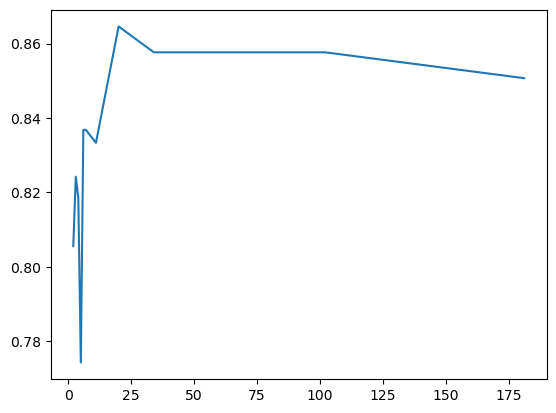

In [19]:
df = pd.DataFrame(balanced_scores, columns=['Alpha', 'Balanced score', 'No. Features'])
df_badly_averaged = df.groupby('No. Features',as_index=False).mean()
plt.plot(df_badly_averaged['No. Features'], df_badly_averaged['Balanced score'])

## Lasso and SVM

In [20]:
#Baseline SVC with lasso for feature selection
# testing class weitgh 'None' vs 'balanced'
# with balanced it gives the best balanced accuracy with 7 features selected
#there is no threshold -> predicting with svm.predict

balanced_scores = []
for alpha in alpha_space:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    # Get the columns with non zro coefficients from lasso
    x_train_subset = X_train.values[:, lasso.coef_!=0]
    x_test_subset = X_test.values[:, lasso.coef_!=0]
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]
    #Train svm on selected features.
    svm = SVC(probability=True, class_weight='balanced')
    svm.fit(x_train_subset, y_train)
    #Test accuracy metrics.
    y_pred = svm.predict(x_test_subset)

    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_pred), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_pred), num_selected_features))


(0.005, 0.7465277777777778, 181)
(0.007, 0.8402777777777778, 102)
(0.009000000000000001, 0.8055555555555556, 62)
(0.011, 0.8263888888888888, 34)
(0.013000000000000001, 0.8923611111111112, 20)
(0.015, 0.8506944444444444, 11)
(0.017, 0.9166666666666667, 7)
(0.019, 0.8854166666666667, 6)
(0.021, 0.8854166666666667, 6)
(0.023000000000000003, 0.8854166666666667, 5)
(0.025, 0.8645833333333333, 4)
(0.027, 0.8645833333333333, 4)
(0.029, 0.8645833333333333, 4)
(0.031000000000000003, 0.8645833333333333, 4)
(0.033, 0.8333333333333333, 3)
(0.034999999999999996, 0.8333333333333333, 3)
(0.037, 0.8333333333333333, 3)
(0.039, 0.8333333333333333, 3)
(0.041, 0.8333333333333333, 3)
(0.043, 0.8333333333333333, 3)
(0.045, 0.8333333333333333, 3)
(0.047, 0.8333333333333333, 3)
(0.048999999999999995, 0.8333333333333333, 2)


In [21]:
#using svm.predict_proba and then the thresholding_model method to tune the threshold
#alpha and the threshold are tuned
#svm class_weight set to balanced  -> without setting it we get slightly worse results

balanced_scores = []
for alpha in alpha_space:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)

    #the selected features with lasso
    num_selected_features = X_train.values[:, lasso.coef_!=0].shape[1]

    # Get the columns with non zero coefficients from lasso
    x_train_subset = X_train.values[:, lasso.coef_!=0]
    x_test_subset = X_test.values[:, lasso.coef_!=0]

    #initialise the model
    svm = SVC(probability=True, class_weight='balanced') 

    #tune the threshold
    optimal_threshold = threshold_model(model=svm, X_train=x_train_subset, thresholds=thresholds)

    
    #Train svm on selected features.
    svm.fit(x_train_subset, y_train)

    #Test accuracy metrics.
    y_pred = svm.predict_proba(x_test_subset)[:,1]
    y_label = thresholding(optimal_threshold,y_pred)

    balanced_scores.append((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))
    print((alpha, balanced_accuracy_score(y_test, y_label), num_selected_features))

(0.005, 0.8333333333333333, 181)
(0.007, 0.8368055555555556, 102)
(0.009000000000000001, 0.8541666666666667, 62)
(0.011, 0.8229166666666667, 34)
(0.013000000000000001, 0.8923611111111112, 20)
(0.015, 0.8819444444444444, 11)
(0.017, 0.9166666666666667, 7)
(0.019, 0.9166666666666667, 6)
(0.021, 0.9166666666666667, 6)
(0.023000000000000003, 0.8854166666666667, 5)
(0.025, 0.8645833333333333, 4)
(0.027, 0.8645833333333333, 4)
(0.029, 0.8645833333333333, 4)
(0.031000000000000003, 0.8645833333333333, 4)
(0.033, 0.8333333333333333, 3)
(0.034999999999999996, 0.8333333333333333, 3)
(0.037, 0.8333333333333333, 3)
(0.039, 0.8333333333333333, 3)
(0.041, 0.8333333333333333, 3)
(0.043, 0.8333333333333333, 3)
(0.045, 0.8333333333333333, 3)
(0.047, 0.8333333333333333, 3)
(0.048999999999999995, 0.8333333333333333, 2)


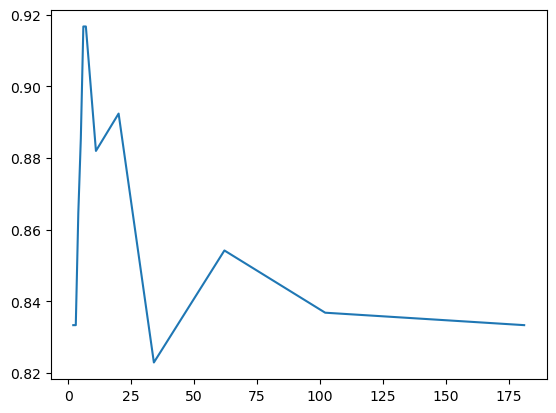

In [22]:
svc_fine_threshold = pd.DataFrame(balanced_scores,columns=['alpha','test_acc','features'])
plt.plot(svc_fine_threshold['features'], svc_fine_threshold['test_acc'])


## Baseline Random Forest

In [23]:
# # we tried this for the forward selection, it gives 0.82 for 5 features

# x_trial = X_train.iloc[:, :10000]
# rf = RandomForestClassifier()

In [24]:
# sfs_trial = sfs(
#     k_features=5,
#     estimator=rf,
#     forward=True,                 # Perform forward selection
#     floating=False,               # Disable dynamic feature adjustment
#     scoring='balanced_accuracy',  # Metric for feature subset evaluation
#     cv=5,                         # 5-fold cross-validation # we tried with 10 folds, nothing changed in terms of accuracy but execution time doubled 
#     n_jobs=-1,                    # Use all CPU cores
#     verbose=2                     # Display progress
# )

In [25]:
# sfs_trial = sfs_trial.fit(x_train_lasso, y_train)

In [26]:
'''# Transform the dataset to include only selected features
X_train_selected = sfs_trial.transform(x_train_lasso)
X_test_selected = sfs_trial.transform(x_test_lasso)

rf = RandomForestClassifier()

rf.fit(X_train_selected, y_train)
y_pred = rf.predict(X_test_selected)


balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(balanced_accuracy)'''

'# Transform the dataset to include only selected features\nX_train_selected = sfs_trial.transform(x_train_lasso)\nX_test_selected = sfs_trial.transform(x_test_lasso)\n\nrf = RandomForestClassifier()\n\nrf.fit(X_train_selected, y_train)\ny_pred = rf.predict(X_test_selected)\n\n\nbalanced_accuracy = balanced_accuracy_score(y_test, y_pred)\nprint(balanced_accuracy)'

## SelectKbest

In [27]:
selector = VarianceThreshold(threshold=0)
X_train_removed_0_var = selector.fit_transform(X_train)
X_test_removed_0_var = selector.transform(X_test)

In [28]:
scores = []
for i in range(1,500,5):

    #baseline method:
    model = SelectKBest(k=i)  #default score function is f_classif which is based on ANOVA F-value
    X_train_kbest = model.fit_transform(X_train_removed_0_var, y_train)
    x_test_kbest = model.transform(X_test_removed_0_var)


    svc = SVC(class_weight='balanced')

    svc.fit(X_train_kbest, y_train)
    y_pred = svc.predict(x_test_kbest)
    
    scores.append(( balanced_accuracy_score(y_test, y_pred), i))
    print((balanced_accuracy_score(y_test, y_pred), i))
#print(scores)

(0.7430555555555556, 1)
(0.7708333333333333, 6)
(0.8333333333333333, 11)
(0.8958333333333333, 16)
(0.8958333333333333, 21)
(0.8819444444444444, 26)
(0.8819444444444444, 31)
(0.8923611111111112, 36)
(0.8923611111111112, 41)
(0.8923611111111112, 46)
(0.8923611111111112, 51)
(0.8923611111111112, 56)
(0.8888888888888888, 61)
(0.8888888888888888, 66)
(0.9201388888888888, 71)
(0.9201388888888888, 76)
(0.9201388888888888, 81)
(0.9166666666666667, 86)
(0.9166666666666667, 91)
(0.9479166666666667, 96)
(0.9097222222222222, 101)
(0.90625, 106)
(0.90625, 111)
(0.9027777777777778, 116)
(0.9027777777777778, 121)
(0.9027777777777778, 126)
(0.9027777777777778, 131)
(0.9027777777777778, 136)
(0.9027777777777778, 141)
(0.9027777777777778, 146)
(0.9027777777777778, 151)
(0.90625, 156)
(0.90625, 161)
(0.9097222222222222, 166)
(0.9097222222222222, 171)
(0.9097222222222222, 176)
(0.9097222222222222, 181)
(0.9131944444444444, 186)
(0.9131944444444444, 191)
(0.9131944444444444, 196)
(0.9131944444444444, 201)


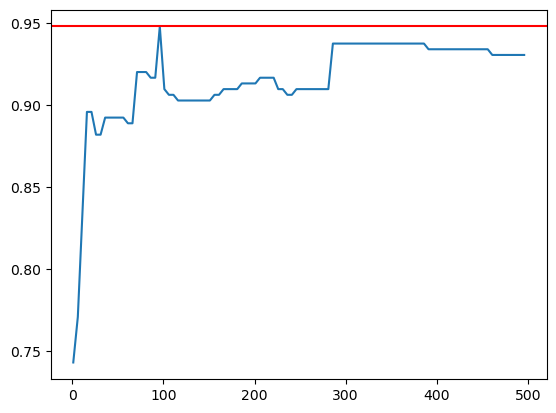

In [29]:
scores_df = pd.DataFrame(scores)
plt.plot(scores_df[1], scores_df[0])
plt.axhline(y=0.9479166666666667,color= 'r',label = '96 features')
